#                                              HomeWork 4

# QUESTION1:

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import mixture
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as scln
from scipy.linalg import inv
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import KFold
from sklearn.svm import SVC
#r=mvn.rvs(mean=mu,cov=cov,size=400)
%matplotlib inline

In [72]:
path ="C:/Users/Umesh/Downloads/planeImage.jpg"
path1 ="C:/Users/Umesh/Downloads/eagleBird.jpg"

In [73]:
def plot(k,x,flag): 
    if flag==1:
        for i in k:
            gmm = mixture.GaussianMixture(n_components=i,covariance_type="full")
            gmm.fit(x)
            y=gmm.predict(x).reshape(321,481)
            plt.figure()
            plt.title("Clusters:"+str(i))
            plt.imshow(y)
    else:
        for i in k:
            kmeans = KMeans(n_clusters=i).fit(x)
            y = kmeans.labels_.reshape(321,481)
            plt.figure()
            plt.title("Clusters:"+str(i))
            plt.imshow(y)

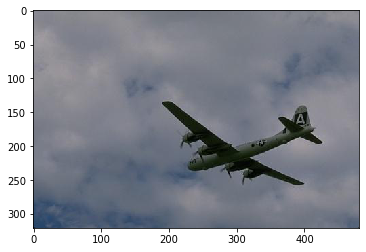

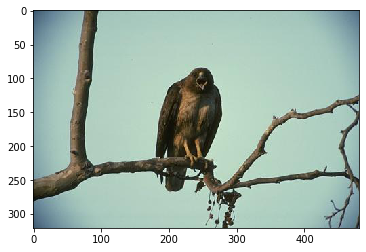

In [74]:
img1 = plt.imread(path)
img2 = plt.imread(path1)
plt.figure(1)
plt.imshow(img1)
plt.figure(2)
plt.imshow(img2)


In [75]:
def function1(img):
    imagepic=[]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            imagepic.append([i, j] +list(img[i][j]))
    x=np.asarray(imagepic,dtype = float)
    for i in range(5):
        x[:,i] = (x[:,i]-min(x[:,i]))/float(max(x[:,i])-min(x[:,i]))
    return x

PLANE IMAGE
GMM Method:


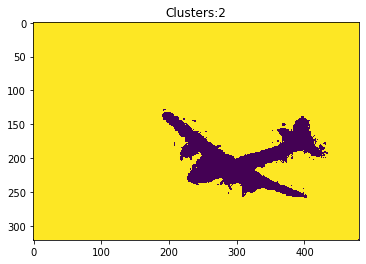

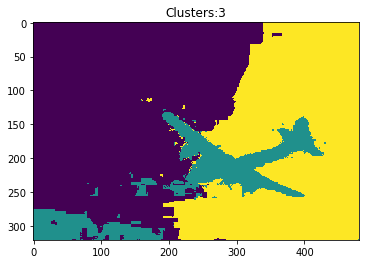

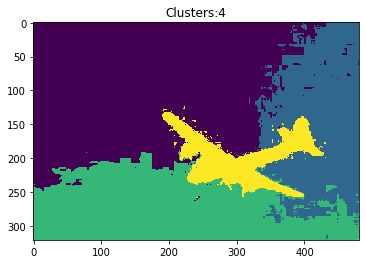

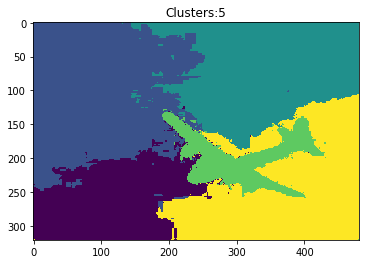

In [76]:
x1 = function1(img1)
k = [2,3,4,5]
print("PLANE IMAGE")
print("GMM Method:")
plot(k, x1, 1)

PLANE IMAGE
Kmean Method:


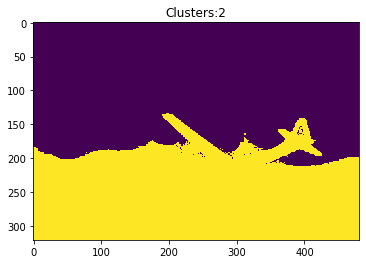

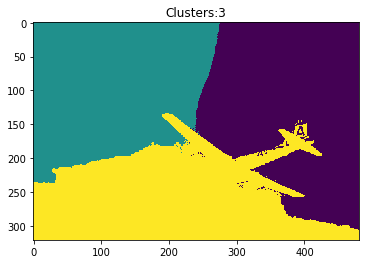

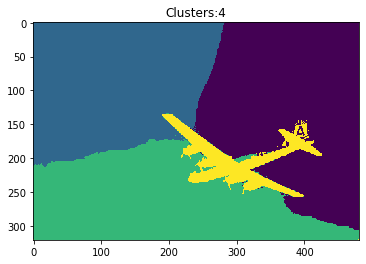

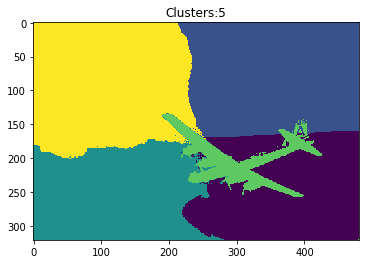

In [77]:
print("PLANE IMAGE")
print("Kmean Method:")
plot(k, x1, 0)

BIRD IMAGE
GMM Method:


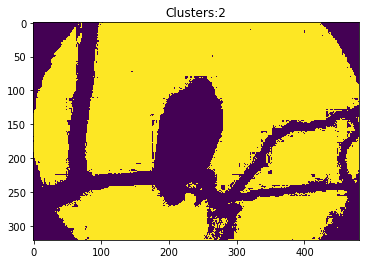

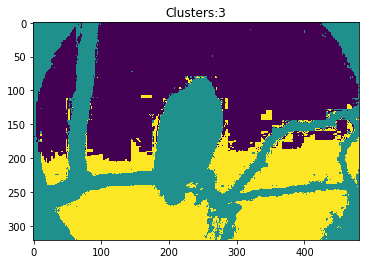

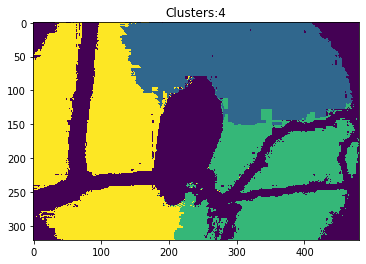

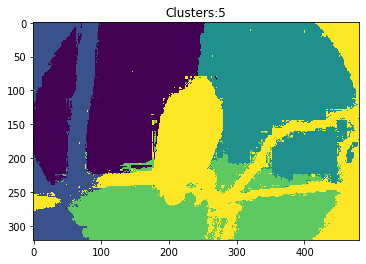

In [78]:
x2 = function1(img2)
print("BIRD IMAGE")
print("GMM Method:")
plot(k,x2,1)

BIRD IMAGE
Kmean Method:


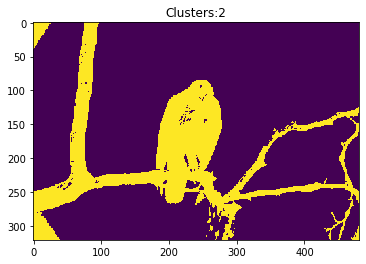

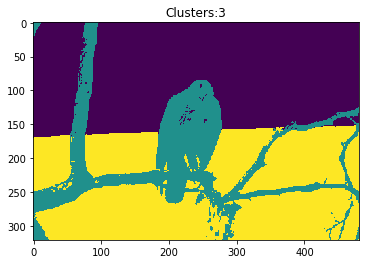

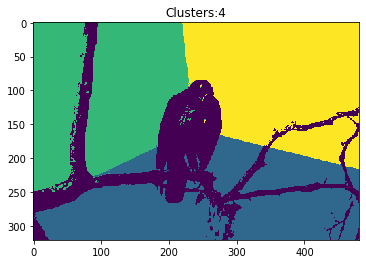

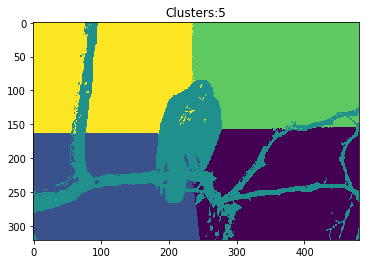

In [79]:
print("BIRD IMAGE")
print("Kmean Method:")
plot(k,x2,0)

# Results:
We can notice that the segmentation acheived from K-means clustering is distinctive and the has sharper edges.The segmentations result we got from the GMM based clustering is comparativly poor. This can be mainly attributed to the fact that K-means clustering works by using the strategy that each point in a cluster is closest to the mean of that particuar cluster. On the contrary, the GMM clustering takes the likelihood of each point into consideration.. Hence, the points which necessarily might not be close to the mean of the cluster, but might be potential outliers will also be classified into appropriate classes by taking their prior probabilities and probability densities into consideration. This tends to make the segmented image seem a little less sharp.
We can conclude from this that what we observerd here is basically K-means performing a hard assignment in finding clusters while GMM does a soft assignment. Since the co-ordinates here are our features finding the euclidean distance(Kmeans) works better than using wheighted distance(GMM).
Hence we can conclude that Kmeans is a good classifier when we have continuous cluster with distinct pixel value contrast.

K-means clustering (working):
The K-means clustering works by the following method: 1) The mean centers are defined based on the number of clusters that the data is required to be divided into. The number of mean centers is equal to the number of clusters. These mean centers can be defined arbitrarily. 2) The data points are classified into clusters based on their distance to each of the mean centers. Each point is classified into the cluster whose mean is closest to it. 3) Based on the data classified into each cluster, a new mean center is calculated for each cluster. And the cycle is repeated from step 1, thus classifying data and calculating new mean centers until there is no change in classification of any of the data points from their class in the preceding iteration.

GMM Clustering (working):
The GMM clustering assumes the data to be of a Gaussian Mixture Model type and performs the Estimation Maximization (EM) technique to find the optimal parameters (prior probability, mean, and covariance) for every cluster of the model. The optimal parameters are calculated using a recursive system of formulae that converge at the maximum estimation of the log-likelihood of the PDF. Here, the aim of this technique is t find clusters such that the log-likelihood of the function is maximized. This, in turn, takes the priors into consideration, thus indirectly implementing the MAP classification while classifying the data into these clusters.

# Question2:

In [149]:
def functioncall(loop1,loop,X,flag):
    o=[]
    for j in loop1:
        n=[]
        for i in loop:
            vs=[]
            clf = SVC(C = i, kernel = 'rbf',gamma=j)
            cv = KFold(n_splits=10, shuffle=True)
            for train_index, test_index in cv.split(X):
                X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
                clf.fit(X_train, y_train)
                if flag == 1:
                    b=clf.predict(X_test)
                else:
                    b=clf.predict(X_train)
                vs.append(b)
            n.append(vs)
        o.append(n)
    if flag == 1:
        return o,y_test
    else:
        return o , y_train

In [150]:
def function2(vs, y_test):
    k = []
    for n in range (len(vs)):
        count=0
        for i in range (0, len(vs[0])):
            if vs[n][i]!=y_test[i]:
                count=count+1
        k.append(count)
    return np.mean(k)

In [151]:
def plotting(r1,r2):
    plt.figure(figsize=(7,7))
    plt.scatter(r1[:,0],r1[:,1],label='class1',color='red', marker = '^')
    plt.scatter(r2[:,0],r2[:,1],label='class2',color='purple', marker = 'o')
    plt.axis('equal')
    plt.title(' Multi-Variate Gaussian Distribution curves of the priors')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper right')
    plt.show()

In [152]:
def samplegenerator(size,p):
    t=0
    b=np.random.choice(2,size,p=[p[0],p[1]])
    for i in b:
        if i==1:
            t=t+1
    size1=[size-t,t]
    return size1

In [153]:
p=[0.35,0.65]
size=1000
x=samplegenerator(1000,p)
mean1=[0,0]
cov1=np.array([[1,0],[0,1]])
r1= np.random.multivariate_normal(mean1, cov1, x[0])
r=np.random.uniform(low=2,high=3,size=x[1])
r2=np.random.uniform(low=-np.pi,high=np.pi,size=x[1])
x=r*np.cos(r2)
x.reshape(x.shape[0],1)
ym=r*np.sin(r2)
ym.reshape(ym.shape[0],1)
z = np.column_stack((x,ym))

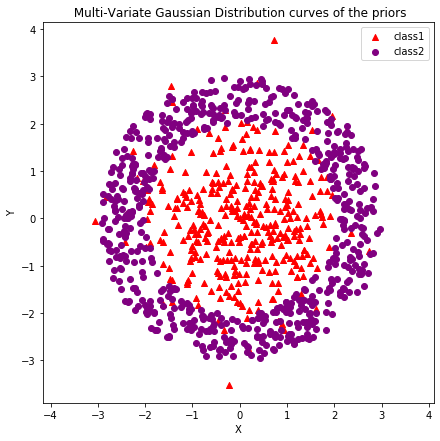

In [154]:
plotting(r1,z)

# LINEAR SVM:

In [155]:
X=np.concatenate((r1,z),axis=0)
y1=np.ones(r1.shape[0])
y2=np.zeros(z.shape[0])
y=np.concatenate((y1,y2),axis=0)
loop=[10**i for i in range(-5,3,1)]

# Performing the cross validation with c:

In [156]:
for i in loop:
    vs=[]
    ts=[]
    clf = SVC(C = i, kernel = 'linear')
    cv = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        b=clf.predict(X_test)
        vs.append(b)
        c=clf.predict(X_train)
        ts.append(c)

In [157]:
k = []
v = []
for n in range (len(vs)):
    count=0
    for i in range (y_test.shape[0]):
        if vs[n][i]!=y_test[i]:
            count=count+1
    k.append(count)
for n in range(len(ts)):
    count1=0
    for i in range(y_train.shape[0]):
        if ts[n][i]!=y_train[i]:
            count1=count1+1
    v.append(count1)

# Count is number of error in testset
# Count1 is number of error in trainset

Text(0.5, 1.0, ' Probability of errors vs C-values for a Linear SVM classifier')

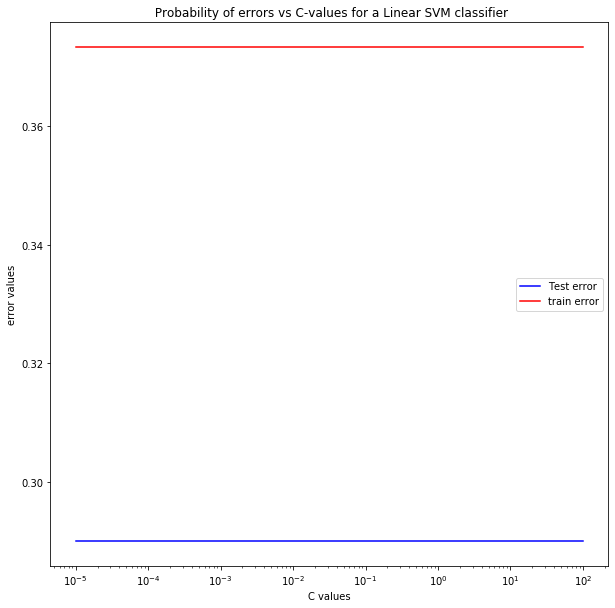

In [158]:
plt.figure(figsize=(10,10))
plt.plot(loop,np.array(k[:8])/100,label="Test error",color = 'blue')
plt.plot(loop,np.array(v[:8])/900,label="train error", color = 'red')
plt.legend()
plt.xscale('log')
plt.xlabel("C values")
plt.ylabel("error values")
plt.title(" Probability of errors vs C-values for a Linear SVM classifier")

# Since the Probability of error is same over all C
# We choose C =1 for trainset

In [159]:
clf = SVC(C = 3, kernel = 'linear')
clf.fit(X,y)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

label_0 classified as label_0: 635
label_0 classified as label_1: 0
label_1 classified as label_0: 365
label_1 classified as label_1: 0


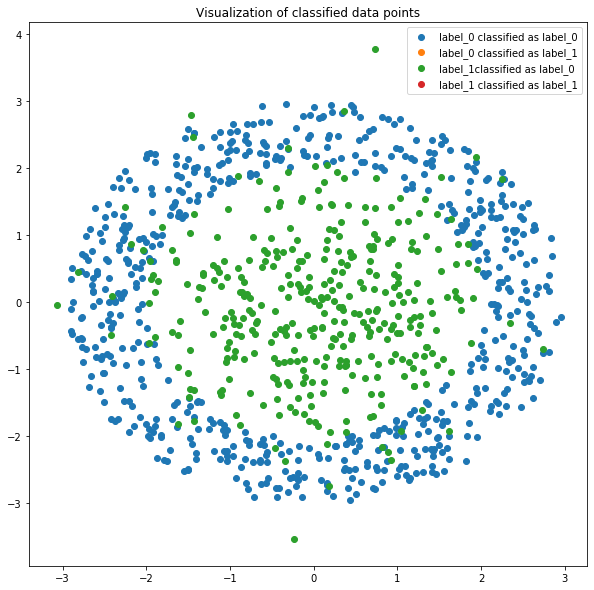

In [160]:
pred_rbf=clf.predict(X)
a0_0=X[((y==0) & (pred_rbf==0))]
a0_1=X[((y==0) & (pred_rbf==1))]
a1_0=X[((y==1) & (pred_rbf==0))]
a1_1=X[((y==1) & (pred_rbf==1))]
plt.figure(figsize=(10,10))
plt.scatter(a0_0.T[0,:],a0_0.T[1,:],label='label_0 classified as label_0')
plt.scatter(a0_1.T[0,:],a0_1.T[1,:],label='label_0 classified as label_1')
plt.scatter(a1_0.T[0,:],a1_0.T[1,:],label='label_1classified as label_0')
plt.scatter(a1_1.T[0,:],a1_1.T[1,:],label='label_1 classified as label_1')
plt.title('Visualization of classified data points')
plt.legend()
print("label_0 classified as label_0:",a0_0.shape[0])
print('label_0 classified as label_1:',a0_1.shape[0])
print('label_1 classified as label_0:',a1_0.shape[0])
print('label_1 classified as label_1:',a1_1.shape[0])

# Since the Probability of error is same over all C
# We choose C =1 for testset

# 4) Classification of test dataset on trained classifier for linear SVM:

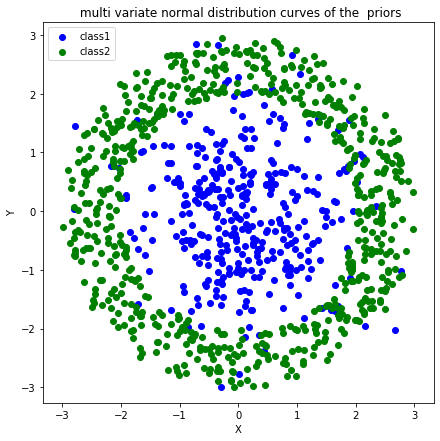

label_0 classified as label_0: 635
label_0 classified as label_1: 0
label_1 classified as label_0: 365
label_1 classified as label_1: 0
Total number of errors: 365
Probability of error:  0.365


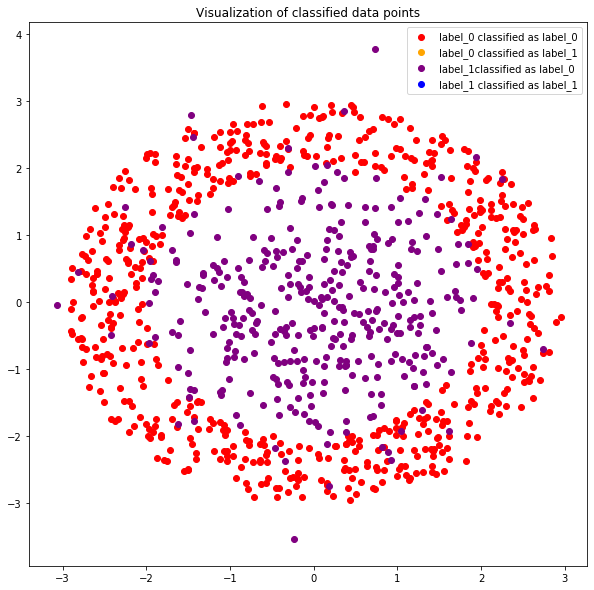

In [175]:
size=1000
x=samplegenerator(1000,p)
mean1=[0,0]
cov1=np.array([[1,0],[0,1]])
r1= np.random.multivariate_normal(mean1, cov1, x[0])
r=np.random.uniform(low=2,high=3,size=x[1]) 
r2=np.random.uniform(low=-np.pi,high=np.pi,size=x[1]) 
x=r*np.cos(r2)
x.reshape(x.shape[0],1)
ym=r*np.sin(r2)
ym.reshape(ym.shape[0],1)
z = np.column_stack((x,ym))
plot(r1,z)
X_test=np.concatenate((r1,z),axis=0)
y1_test=np.ones(r1.shape[0])
y2_test=np.zeros(z.shape[0])
y_test=np.concatenate((y1,y2),axis=0)
pred_rbf=clf.predict(X_test)
a0_0=X[((y==0) & (pred_rbf==0))]
a0_1=X[((y==0) & (pred_rbf==1))]
a1_0=X[((y==1) & (pred_rbf==0))]
a1_1=X[((y==1) & (pred_rbf==1))]
plt.figure(figsize=(10,10))
plt.scatter(a0_0.T[0,:],a0_0.T[1,:],label='label_0 classified as label_0',color = 'red')
plt.scatter(a0_1.T[0,:],a0_1.T[1,:],label='label_0 classified as label_1',color = 'orange')
plt.scatter(a1_0.T[0,:],a1_0.T[1,:],label='label_1classified as label_0', color = 'purple')
plt.scatter(a1_1.T[0,:],a1_1.T[1,:],label='label_1 classified as label_1', color = 'blue')
plt.title('Visualization of classified data points')
plt.legend()
print("label_0 classified as label_0:",a0_0.shape[0])
print('label_0 classified as label_1:',a0_1.shape[0])
print('label_1 classified as label_0:',a1_0.shape[0])
print('label_1 classified as label_1:',a1_1.shape[0])
print("Total number of errors:" , a0_1.shape[0]+a1_0.shape[0])
poe1 = (a0_1.shape[0]+a1_0.shape[0])/1000
print("Probability of error: ", poe1)

# RBF KERNEL SVM WITH HYPERMATERS

In [162]:
loop1=[10**i for i in range(-5,5,1)]
loop=[10**i for i in range(-4,5,1)]

In [163]:
k = []
flag = 1
o,y_t = functioncall(loop1,loop,X,flag)
for i in range(0,len(loop1)):
    for j in range(0,len(loop)):
        k.append(function2(o[i][j],y_t))

C:\Users\Umesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'level'
  


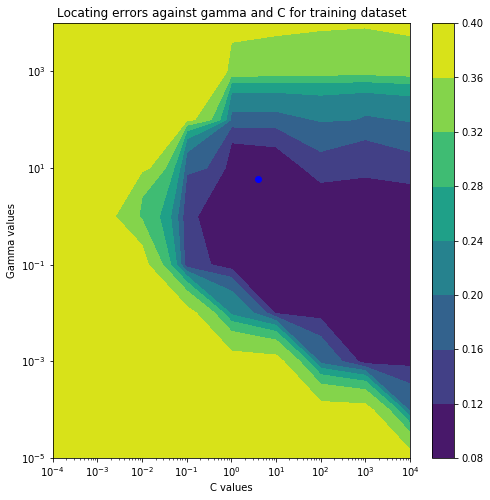

In [164]:
xx,yy=np.meshgrid(loop,loop1)
k = np.array(k)/100
k = k.reshape([len(loop1),len(loop)])
kminco = np.argmin(k)
xmin = kminco//(len(loop))
ymin = kminco%(len(loop))
plt.figure(num=1, figsize = (8,8))
plt.contourf(xx,yy,k,level=[50,60,70,80,90,100])
plt.plot(xmin,ymin,color='b',marker='o')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.xlabel("C values")
plt.ylabel("Gamma values")
plt.title("Locating errors against gamma and C for training dataset")
plt.show()

# From this we get best value of gamma and c for which probability of error is minimum

In [165]:
k = []
flag = 0
o,y_t = functioncall(loop1,loop,X,flag)

for i in range(0,len(loop1)):
    for j in range(0,len(loop)):
        k.append(blah(o[i][j],y_t))

Probability of error(minimum wrt to c and gamma) : 
6.858710562414266e-12


C:\Users\Umesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'level'
  # Remove the CWD from sys.path while we load stuff.


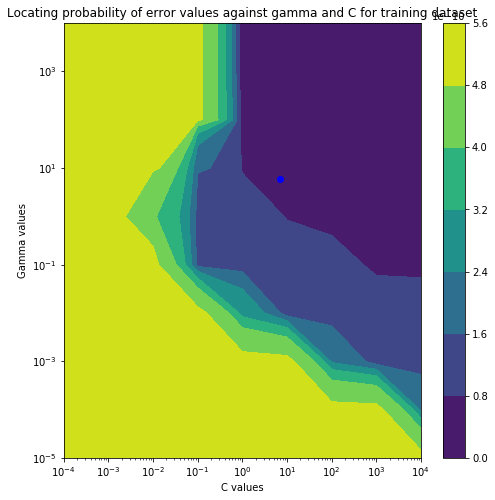

In [169]:
xx,yy=np.meshgrid(loop,loop1)
k = np.array(k)/900
k = k.reshape([len(loop1),len(loop)])
kminco = np.argmin(k)
xmin = kminco//(len(loop))
ymin = kminco%(len(loop))

plt.figure(num=1, figsize = (8,8))
plt.contourf(xx,yy,k,level=[50,60,70,80,90,100])
plt.plot(xmin,ymin,color='b',marker='o')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.xlabel("C values")
plt.ylabel("Gamma values")
plt.title("Locating probability of error values against gamma and C for training dataset")
plt.show()

label_0 classified as label_0: 634
label_0 classified as label_1: 1
label_1 classified as label_0: 32
label_1 classified as label_1: 333
Probability of error:  0.033


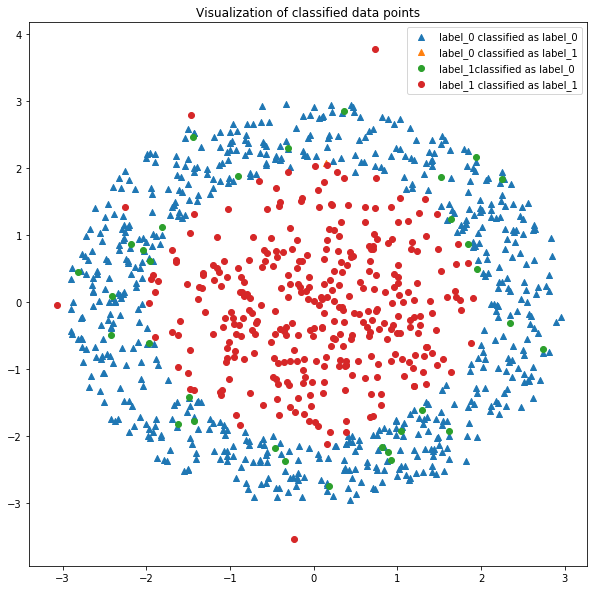

In [171]:
clf_rbf = SVC(C = 10, kernel = 'rbf',gamma=10)
clf_rbf.fit(X,y)
pred_rbf=clf_rbf.predict(X)
a0_0=X[((y==0) & (pred_rbf==0))]
a0_1=X[((y==0) & (pred_rbf==1))]
a1_0=X[((y==1) & (pred_rbf==0))]
a1_1=X[((y==1) & (pred_rbf==1))]
plt.figure(figsize=(10,10))

plt.scatter(a0_0.T[0,:],a0_0.T[1,:],label='label_0 classified as label_0',marker = '^')
plt.scatter(a0_1.T[0,:],a0_1.T[1,:],label='label_0 classified as label_1', marker = '^')
plt.scatter(a1_0.T[0,:],a1_0.T[1,:],label='label_1classified as label_0', marker = 'o')
plt.scatter(a1_1.T[0,:],a1_1.T[1,:],label='label_1 classified as label_1',marker = 'o')
plt.title('Visualization of classified data points')
plt.legend()
print("label_0 classified as label_0:",a0_0.shape[0])
print('label_0 classified as label_1:',a0_1.shape[0])
print('label_1 classified as label_0:',a1_0.shape[0])
print('label_1 classified as label_1:',a1_1.shape[0])
poe = (a0_1.shape[0]+a1_0.shape[0])/1000
print("Probability of error: ", poe)

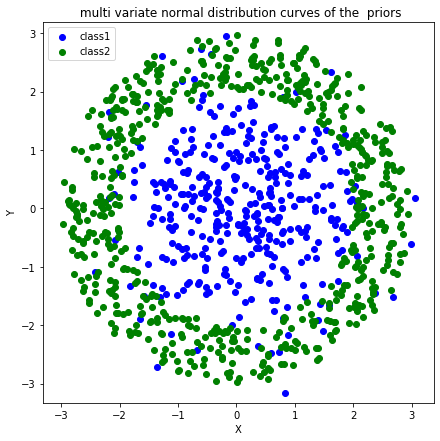

number of samples of label 1 classified as class1   611
number of samples of label1 classified as class 2   24
number of samples of label 2 classified as class 1  55
number of samples of label 2 classified as class 2  310
Total number of errors: 79
Probability of error:  0.079


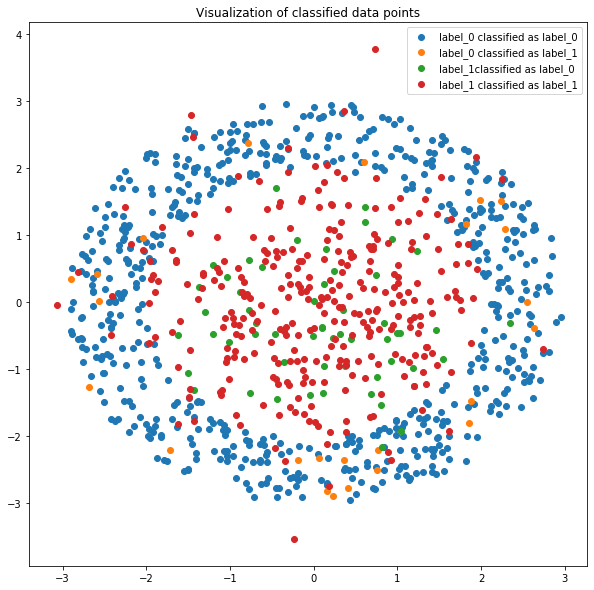

In [174]:
size=1000
x=samplegenerator(1000,p)
mean1=[0,0]
cov1=np.array([[1,0],[0,1]])
r1= np.random.multivariate_normal(mean1, cov1, x[0])
r=np.random.uniform(low=2,high=3,size=x[1]) 
r2=np.random.uniform(low=-np.pi,high=np.pi,size=x[1])
x=r*np.cos(r2)
x.reshape(x.shape[0],1)
ym=r*np.sin(r2)
ym.reshape(ym.shape[0],1)
z = np.column_stack((x,ym))
plot(r1,z)
X_test=np.concatenate((r1,z),axis=0)
y1_test=np.ones(r1.shape[0])
y2_test=np.zeros(z.shape[0])
y_test=np.concatenate((y1,y2),axis=0)
pred_rbf=clf_rbf.predict(X_test)
a0_0=X[((y==0) & (pred_rbf==0))]
a0_1=X[((y==0) & (pred_rbf==1))]
a1_0=X[((y==1) & (pred_rbf==0))]
a1_1=X[((y==1) & (pred_rbf==1))]
plt.figure(figsize=(10,10))
plt.scatter(a0_0.T[0,:],a0_0.T[1,:],label='label_0 classified as label_0')
plt.scatter(a0_1.T[0,:],a0_1.T[1,:],label='label_0 classified as label_1')
plt.scatter(a1_0.T[0,:],a1_0.T[1,:],label='label_1classified as label_0')
plt.scatter(a1_1.T[0,:],a1_1.T[1,:],label='label_1 classified as label_1')
plt.title('Visualization of classified data points')
plt.legend()
print("number of samples of label 1 classified as class1   {}".format(a0_0.shape[0])) 
print("number of samples of label1 classified as class 2   {}".format(a0_1.shape[0])) 
print("number of samples of label 2 classified as class 1  {}".format(a1_0.shape[0])) 
print("number of samples of label 2 classified as class 2  {}".format(a1_1.shape[0])) 
print("Total number of errors:" , a0_1.shape[0]+a1_0.shape[0])
poe1 = (a0_1.shape[0]+a1_0.shape[0])/1000
print("Probability of error: ", poe1)

# Comments:
Comments on results:
Observations:
1. Probability of error for linear SVM is more than Gaussian SVM 
2. Data at hand is partially gaussian

Data at hand is partially gaussian in nature hence linear SVM fails since it tries to classifies the data in the same dimensions wheras we observe a lower probability of error in case of gassian SVM classifier as it transforms the data in a higher dimensional space.
SVM or Support Vector Machine is a classifier which aims to maximise the separation distance between the boundary and the closest data points of the classes from it. But when the data is present in a non-linear form, it cannot classify the data merely on this criteria. Hence, it uses non-linear classification techniques such as the Gausian-SVM. Here, the classifier transforms the data into a higher dimension and classifies the data using a higher dimensional vector or plane trying to maximise the gap between the boundary and the closest points of the classes.